# The isothermal-$\beta$ model

In this notebook, we will use `MockSZ` to generate spatially extended maps of a galaxy cluster using the so-called isothermal-$\beta$ model. In this spherically symmetric model, $T_\mathrm{e}$ is assumed constant across the cluster.

We will build a model, based on the CL 0016+16 cluster. Then, for several frequencies we plot the spatially extended effect for both the tSZ and kSZ.

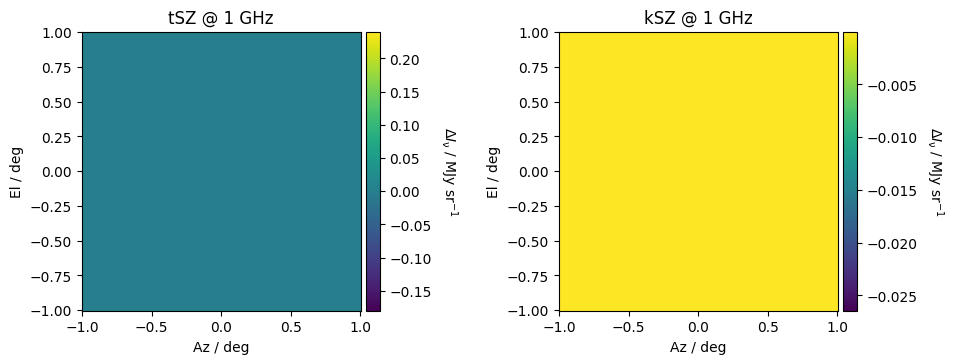

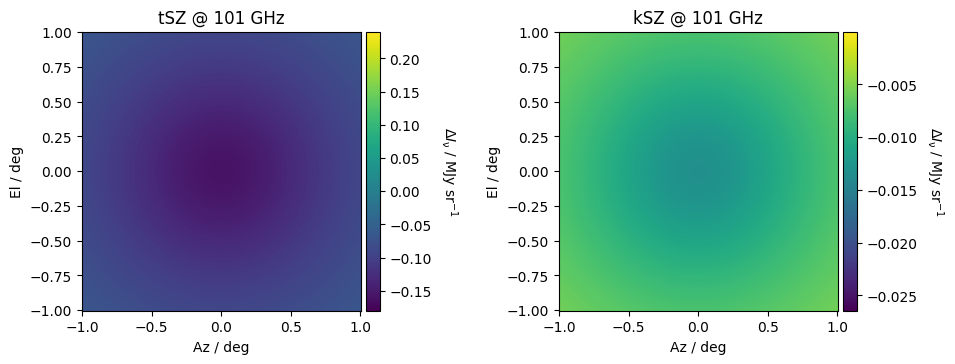

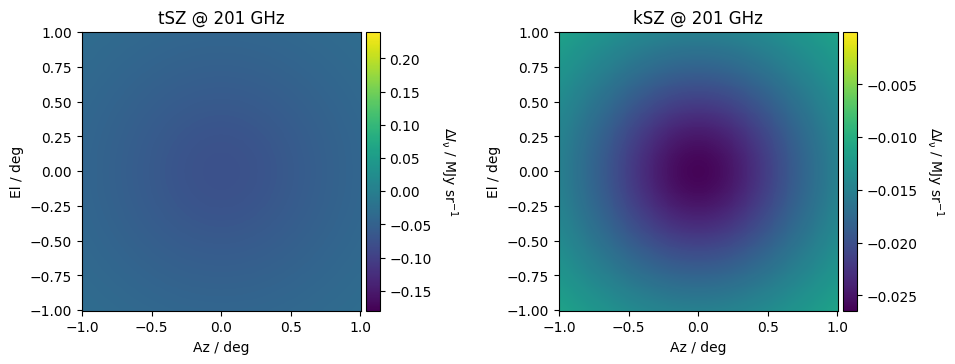

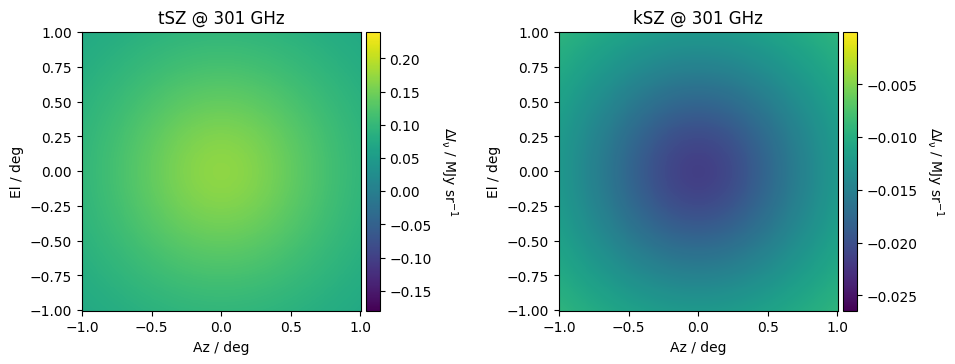

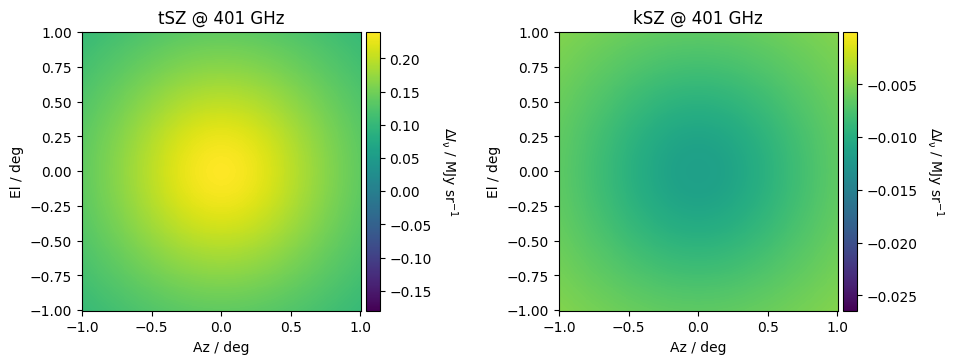

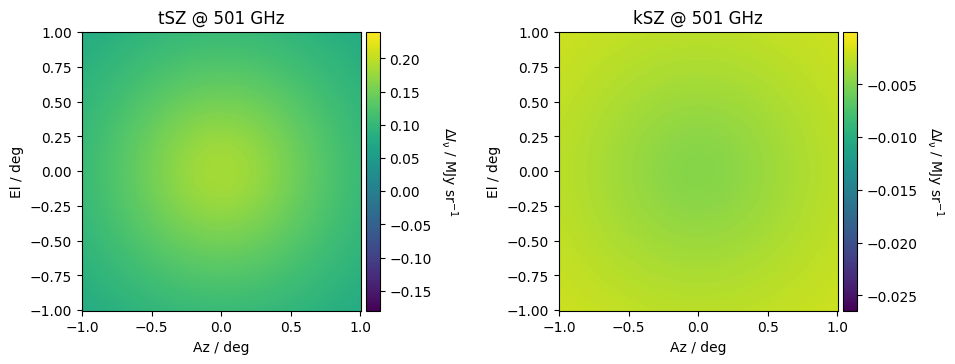

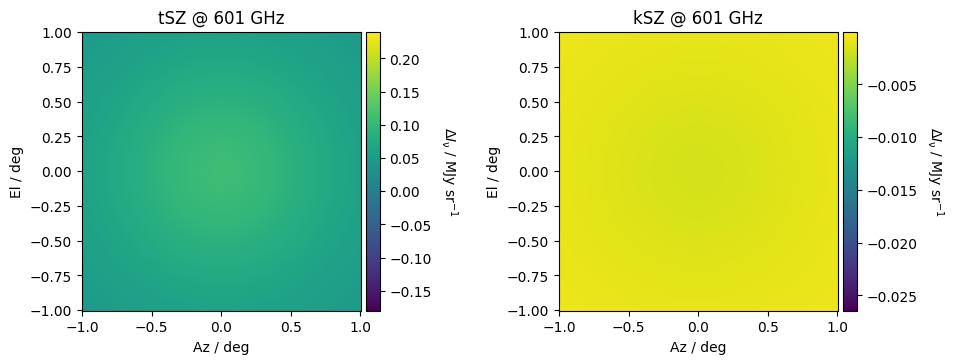

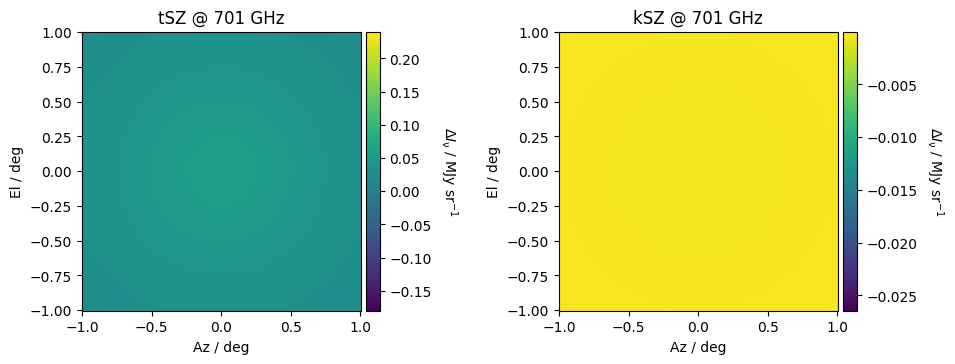

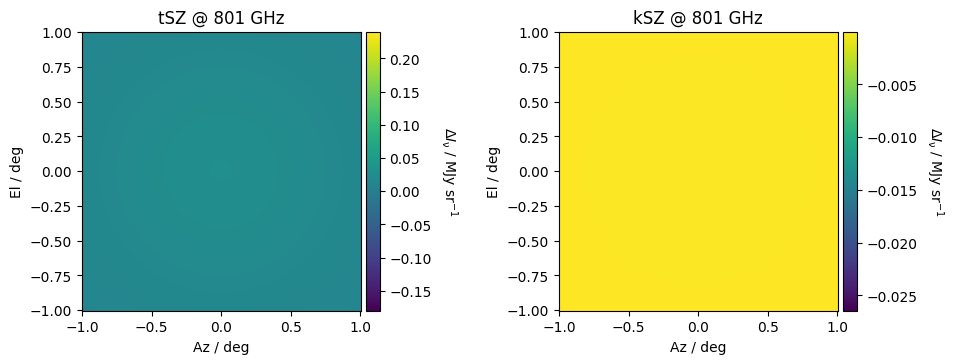

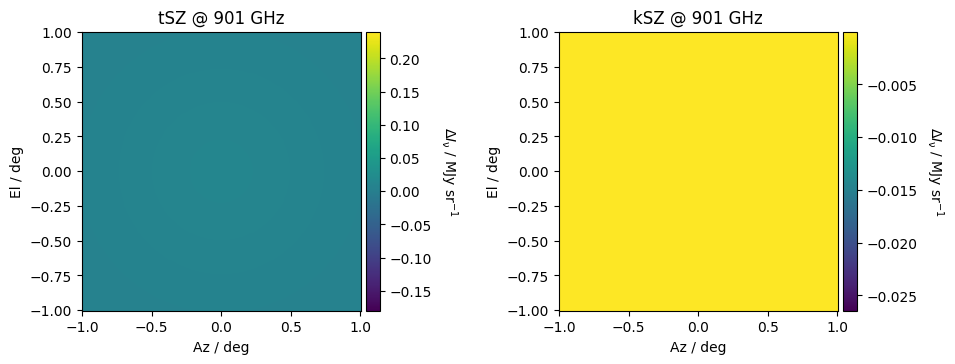

In [51]:
import MockSZ.Models as MModel
import MockSZ.Conversions as MConv

import numpy as np

import matplotlib.pyplot as pt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Te = MConv.eV_Temp(9e3)
ne0 = 1e-2 * 100**3
rc = MConv.pc_m(150e3)
beta = 0.73
Da = MConv.pc_m(760e6)
v_pec = 700e3

nu = np.linspace(1, 1000, num=1000) * 1e9

isob = MModel.IsoBetaModel(Te, ne0, rc, beta, Da, v_pec=v_pec)

Az, El = np.mgrid[-1:1:300j, -1:1:300j]
theta = np.sqrt(Az**2 + El**2)

tSZ = MConv.SI_JySr(isob.tSZMap(theta, nu)) * 1e-6 # MJy / sr
kSZ = MConv.SI_JySr(isob.kSZMap(theta, nu)) * 1e-6 # MJy / sr

min_tplot = np.min(tSZ)
max_tplot = np.max(tSZ)

min_kplot = np.min(kSZ)
max_kplot = np.max(kSZ)

for i in range(10):
    fig, ax = pt.subplots(1,2, figsize=(10,5), gridspec_kw={"wspace":0.6})
    _t = ax[0].pcolormesh(Az, El, tSZ[:,:,i*100], vmin=min_tplot, vmax=max_tplot)
    _k = ax[1].pcolormesh(Az, El, kSZ[:,:,i*100], vmin=min_kplot, vmax=max_kplot)
    
    divider0 = make_axes_locatable(ax[0])
    divider1 = make_axes_locatable(ax[1])
    cax0 = divider0.append_axes('right', size='5%', pad=0.05)
    cax1 = divider1.append_axes('right', size='5%', pad=0.05)
    
    _tc = fig.colorbar(_t, cax=cax0, orientation="vertical")
    _kc = fig.colorbar(_k, cax=cax1, orientation="vertical")
    
    _tc.set_label(r"$\Delta I_\mathrm{\nu}$ / MJy sr$^{-1}$", rotation=270, labelpad=20)
    _kc.set_label(r"$\Delta I_\mathrm{\nu}$ / MJy sr$^{-1}$", rotation=270, labelpad=20)
    
    ax[0].set_aspect(1)
    ax[1].set_aspect(1)
    
    ax[0].set_title(f"tSZ @ {nu[i*100]*1e-9:.0f} GHz")
    ax[1].set_title(f"kSZ @ {nu[i*100]*1e-9:.0f} GHz")
    
    ax[0].set_xlabel(f"Az / deg")
    ax[0].set_ylabel(f"El / deg")
    
    ax[1].set_xlabel(f"Az / deg")
    ax[1].set_ylabel(f"El / deg")
    pt.show()
